# **Project Name**    -



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Member -** Shivanshu Singh Bisht


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

We are provided with historical sales data for 1,115 Rossmann stores. Note that some stores in the dataset were temporarily closed for refurbishment.

The task is to forecast the "Sales" column for the test set.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab


matplotlib.style.use('ggplot')                      # Applies the "ggplot" style to Matplotlib plots, giving them a specific aesthetic inspired by the ggplot2 package in R.
sns.set_style('white')                              # Sets the Seaborn plot style to "white," which removes the background grid for a clean look.
pylab.rcParams['figure.figsize'] = 8,6              # Adjusts the default size of plots to 8 inches wide by 6 inches tall using Pylab's rcParams.
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
rossman_df= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Rossmann Stores Data.csv', low_memory= False)
store_path='/content/drive/My Drive/ColabNotebooks/store.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
store_df=pd.read_csv(store_path)

### Analysing Rossman Dataframe.

In [ ]:
# Dataset First Look
pd.concat([rossman_df.head(),rossman_df.tail()])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


So we have data starting from start of 2013 to the end of August of 2015. Thats is 31 months.

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rossman_df.shape

(1017209, 9)

### Dataset Information

In [ ]:
# Dataset Info
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#No. Of Stores in the Dataset
print(f'Number of stores are: {rossman_df.Store.nunique()}')

Number of stores are: 1115


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Number of duplicates in Rossman dataframe: {rossman_df.duplicated().sum()}')

Number of duplicates in Rossman dataframe: 0


In [ ]:
print(f'Number of duplicates in Store dataframe: {store_df.duplicated().sum()}')

Number of duplicates in Store dataframe: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f'Number of null values in Rossman dataframe: {rossman_df.isnull().sum()}')

Number of null values in Rossman dataframe: Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [ ]:
print(f'Number of null values in Store dataframe: {store_df.isnull().sum()}')

Number of null values in Store dataframe: Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Rossman dataset has 0 duplicate value and 0 null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Columns in Rossman Dataset are: ")
for i in rossman_df.columns:
  print(i)

Columns in Rossman Dataset are: 
Store
DayOfWeek
Date
Sales
Customers
Open
Promo
StateHoliday
SchoolHoliday


In [ ]:
# Converting Date to datetime
rossman_df['Date']=pd.to_datetime(rossman_df['Date'])

#Extract features like Year, Month, Day, WeekOfYear from the Date
rossman_df['Year']=rossman_df['Date'].dt.year
rossman_df['Month']=rossman_df['Date'].dt.month
rossman_df['Day']=rossman_df['Date'].dt.day
rossman_df['WeekOfYear'] = rossman_df['Date'].dt.isocalendar().week

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


In [ ]:
rossman_df.dtypes

,0
Store,int64
DayOfWeek,int64
Date,datetime64[ns]
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64
Year,int32


StateHoliday is of categorical type, so let us see what unique value it is holding.


In [ ]:
rossman_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

# Data Analysis of Rossmann datset.

We begin by examining the composition of our data, identifying which variables are continuous and which are categorical. Upon exploring the data, we identify an opportunity to create a new feature: the number of sales divided by the number of customers, which could serve as a useful metric for average sales per customer. Additionally, we assume that missing values in this column correspond to zero customers, as customers drive sales, and we decide to remove these entries.

It’s important to note the order of the data, which is arranged from the most recent to the oldest date. This could pose a potential issue when developing our model.

In [ ]:
rossman_df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,23.615515
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.0
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,11.0
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,22.0
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,35.0
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,52.0
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,14.433381


Next, we create a new metric to see average sales per customer, as it will give us more clear understanding of the dataset.

In [ ]:
rossman_df['Sales/Customer']=rossman_df['Sales']/rossman_df['Customers']
rossman_df['Sales/Customer'].head()

,Sales/Customer
0,9.482883
1,9.702400
2,10.126675
3,9.342457
4,8.626118


We are going to Check if there are any missing values with our new metric and drop them. Either the customers or the sales should be zero to give us a null SalesPerCustomer.

In [ ]:
new_null=rossman_df.isnull().sum()
new_null

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0


In [ ]:
# Drooping the null values
rossman_df=rossman_df.dropna()
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Sales/Customer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,8.626118


Heatmap to see any dependency among the features of the dataset.

<Axes: >

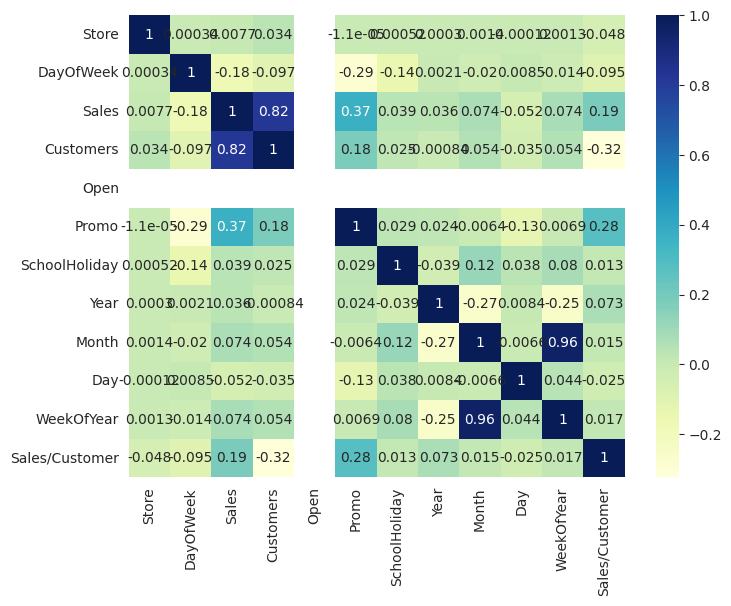

In [ ]:
num_df=rossman_df.select_dtypes(include=[np.number])
sns.heatmap(num_df.corr(), annot=True, cmap='YlGnBu')

Strong correlation can be seen in Sale and Customer.

Transforming Variable StateHoliday in numerical.

In [ ]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

**Distributions of key columns like Sales and Customers and their relationship with other variables.**

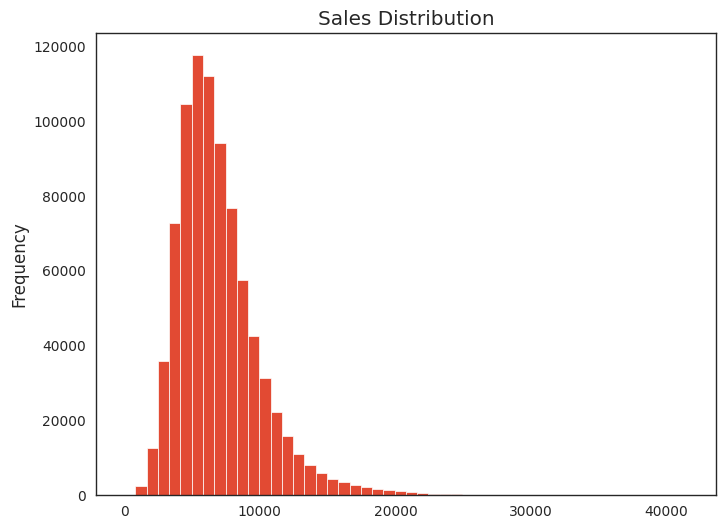

In [ ]:
rossman_df['Sales'].plot(kind='hist', bins=50, title='Sales Distribution');

<Axes: xlabel='Promo', ylabel='Sales'>

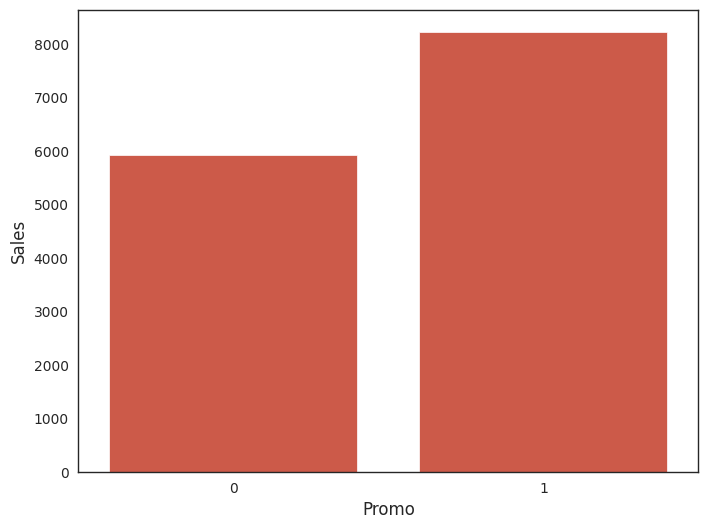

In [ ]:
#Impact of promo on sales
promo_sales_df = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=promo_sales_df.index, y = promo_sales_df['Sales'])

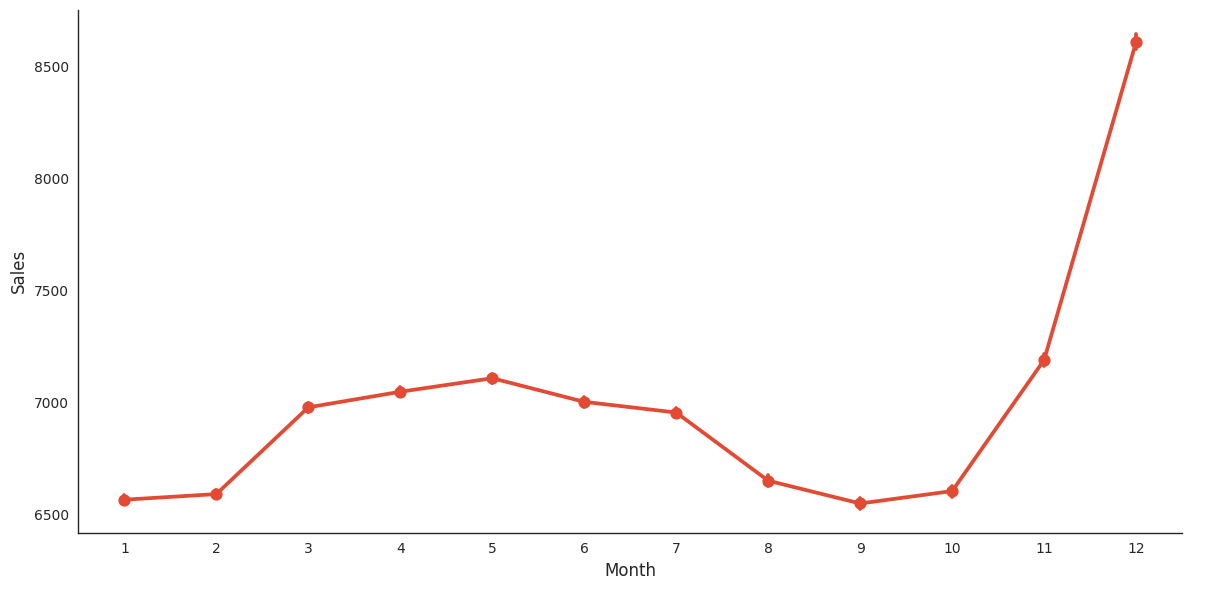

In [ ]:
sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2, height=6)

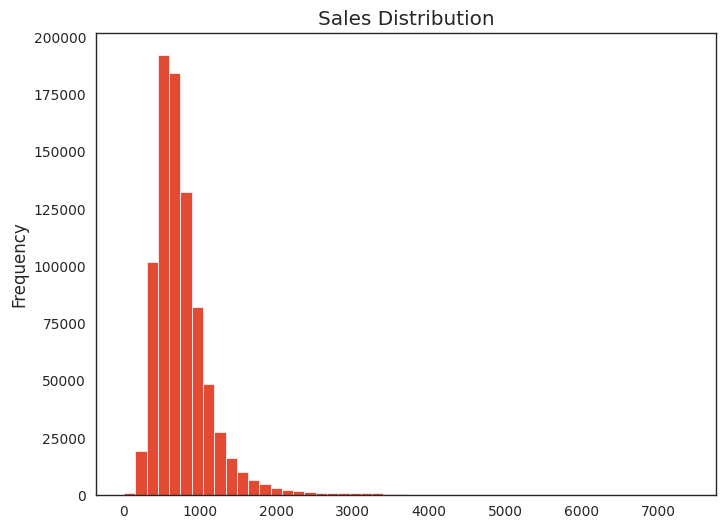

In [ ]:
rossman_df['Customers'].plot(kind='hist', bins=50, title='Sales Distribution');

As we can see it is nearly a normal distribution but it is also slightly skewed(Postively Skewed). So to address this moderate skewness in data:

**For positively skewed data:** Apply the square root transformation sqrt(x). This transformation compresses larger values and can help reduce the skewness.

**For negatively skewed data:** Use the transformation sqrt(max(x + 1) - x). This approach works by reflecting the data, shifting it, and then applying the square root to address the negative skew.**

In [ ]:
rossman_df['Sales']=np.sqrt(rossman_df['Sales'])
rossman_df['Customers']=np.sqrt(rossman_df['Customers'])

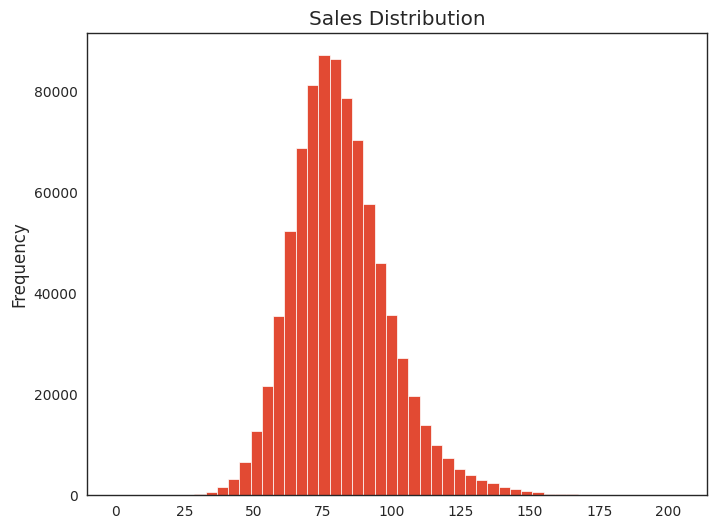

In [ ]:
rossman_df['Sales'].plot(kind='hist', bins=50, title='Sales Distribution');

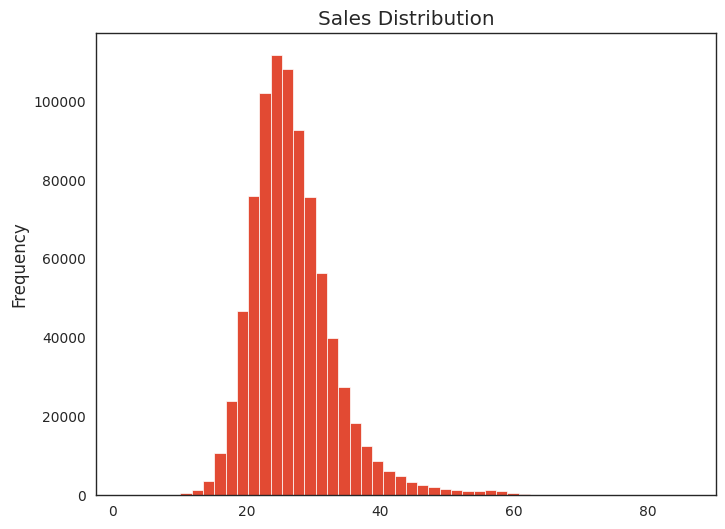

In [ ]:
rossman_df['Customers'].plot(kind='hist', bins=50, title='Sales Distribution');

Let's remove the outliers so it doesn't affect our analysis that much.

In [ ]:
# Calculate IQR
Q1 = rossman_df['Sales'].quantile(0.25)
Q3 = rossman_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap extreme values
rossman_df['Sales'] = rossman_df['Sales'].clip(lower=lower_bound, upper=upper_bound)

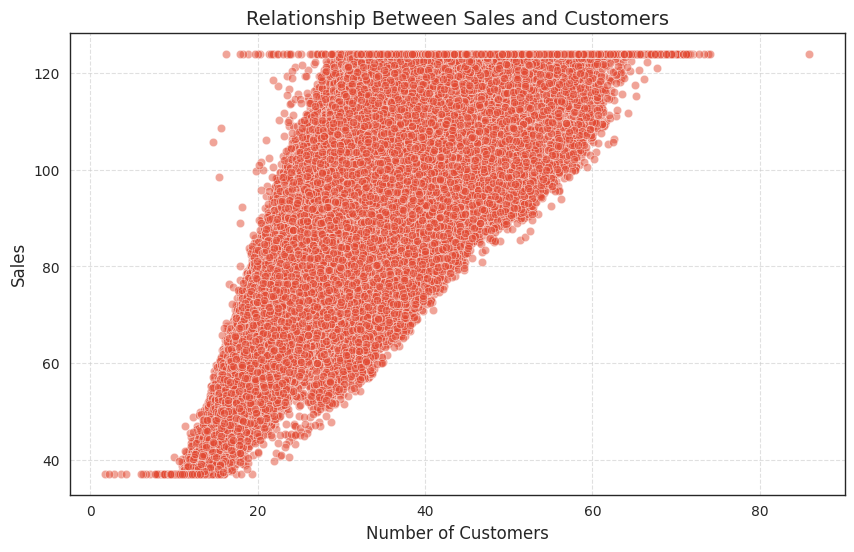

In [ ]:
# Scatter plot to visualize the relationship between Sales and Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rossman_df, x='Customers', y='Sales', alpha=0.5)
plt.title('Relationship Between Sales and Customers', fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

# Exploratory Data Analysis (Store Data)

We do the same as we did for our training set. Exploring the data, we see that there are only 3 missing values in CompetitionDistance. Because this is such a small amount, we elect to replace these with the mean of the column. The other missing values are all dependent on Promo2. Because these missing values are because Promo2 is equal to 0, we can replace these nulls with 0.

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
store_df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


Since there are only 3 missing values from this, we fill with the average from the column

In [ ]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

<ipython-input-36-164e3b06030c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)


The rows that do not have any Promo2 we can fill the rest of the values with 0

In [ ]:
store_df.fillna(0, inplace = True)

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
#Unique Value Present in Stores dataset
categorical_features = [i for i in store_df.columns if store_df[i].dtypes == object]
for i in categorical_features:
  print(f'Unique Elements present in {i} are')
  print(store_df[i].unique())

Unique Elements present in StoreType are
['c' 'a' 'd' 'b']
Unique Elements present in Assortment are
['a' 'c' 'b']
Unique Elements present in PromoInterval are
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


**Distribution Of Different Store Types**

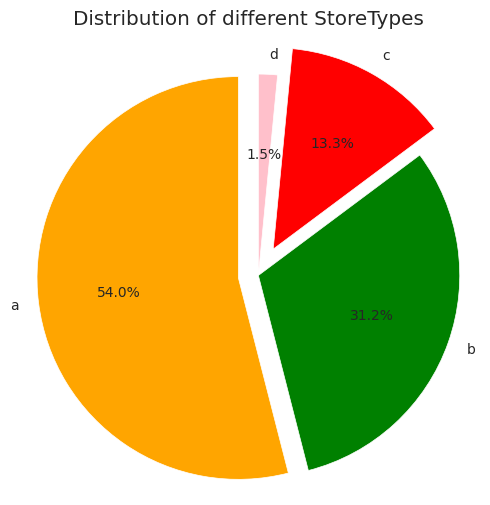

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<ipython-input-41-235530f9da41>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=store_df, x='CompetitionDistance', shade=True, color='green')


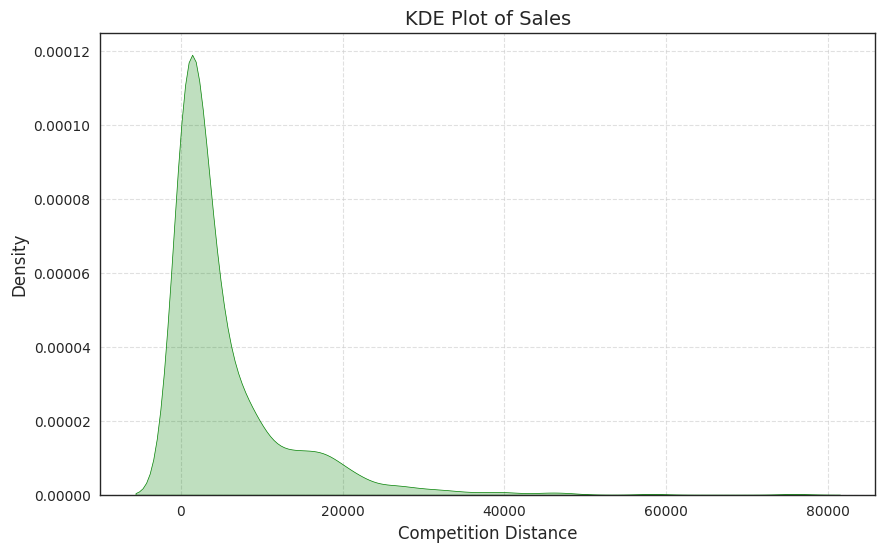

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store, let's first have a look at its distribution
# KDE plot for distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=store_df, x='CompetitionDistance', shade=True, color='green')
plt.title('KDE Plot of Sales', fontsize=14)
plt.xlabel('Competition Distance', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()


Since Competition distance value is positively skewed and large compared to other features let us apply logarithmic transformation.

In [ ]:
store_df['CompetitionDistance'] = np.log(store_df['CompetitionDistance'])

**Checking stores with their assortment type**

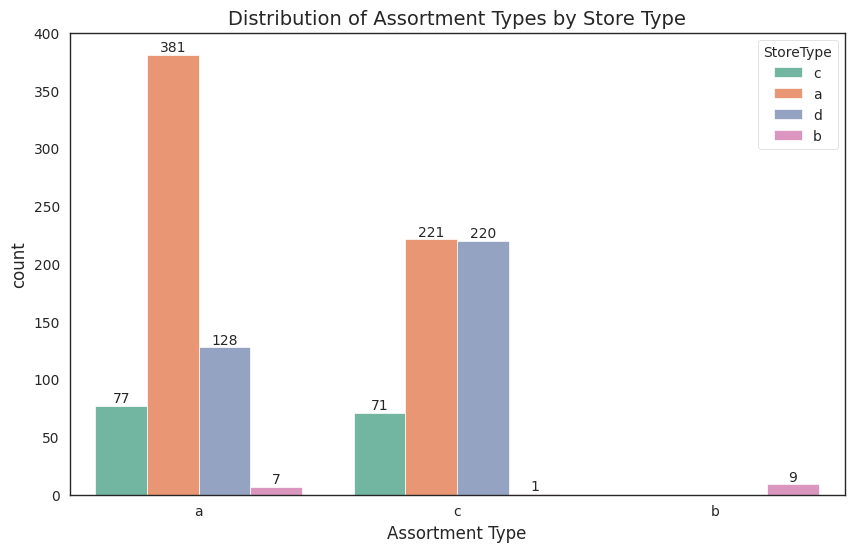

In [ ]:
   plt.figure(figsize=(10, 6))
ax=sns.countplot(data=store_df, x='Assortment', palette='Set2', hue='StoreType')
plt.title('Distribution of Assortment Types by Store Type', fontsize=14)
plt.xlabel('Assortment Type', fontsize=12)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Merging the datasets

To get further insights let us merge both datasets, with "Store" column as joining key.

In [ ]:
merge_df = pd.merge(rossman_df, store_df, how='left', on='Store')
pd.concat([merge_df.head(), merge_df.tail()])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Sales/Customer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,72.546537,23.558438,1,1,0,1,2015,...,9.482883,c,a,7.146772,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,77.871689,25.000000,1,1,0,1,2015,...,9.702400,a,a,6.345636,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,91.181138,28.653098,1,1,0,1,2015,...,10.126675,a,a,9.556055,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,118.300465,38.704005,1,1,0,1,2015,...,9.342457,c,c,6.429719,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,69.440622,23.643181,1,1,0,1,2015,...,8.626118,a,a,10.305948,4.0,2015.0,0,0.0,0.0,0
844335,682,2,2013-01-01,58.094750,23.790755,1,0,1,1,2013,...,5.962898,b,a,5.010635,9.0,2006.0,0,0.0,0.0,0
844336,733,2,2013-01-01,103.754518,48.754487,1,0,1,1,2013,...,4.528818,b,b,6.756932,10.0,1999.0,0,0.0,0.0,0
844337,769,2,2013-01-01,70.957734,35.327043,1,0,1,1,2013,...,4.034455,b,b,6.733402,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844338,948,2,2013-01-01,67.014924,32.233523,1,0,1,1,2013,...,4.322425,b,b,7.265430,0.0,0.0,0,0.0,0.0,0
844339,1097,2,2013-01-01,77.207513,37.483330,1,0,1,1,2013,...,4.242705,b,b,6.579251,3.0,2002.0,0,0.0,0.0,0


In [ ]:
merge_df.shape

(844340, 23)

In [ ]:
merge_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Year,0


In [ ]:
merge_df.duplicated().sum()

0

Let us make a copy of merged dataset.

In [ ]:
copy_merge=merge_df.copy()

**Distribution of Sales on the basis of StoreType**

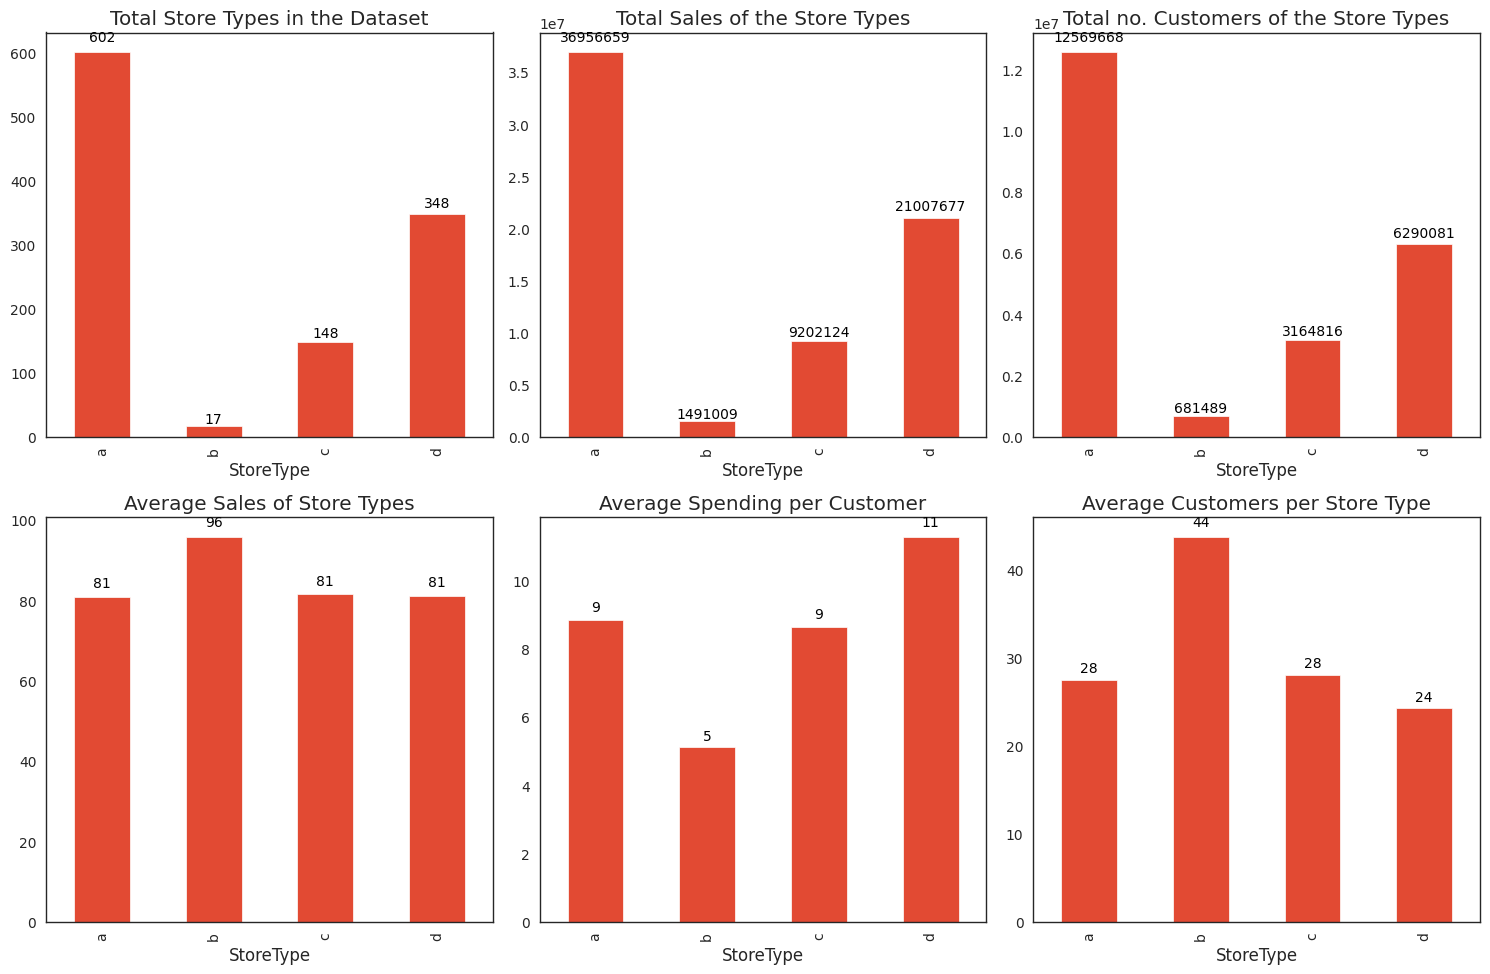

In [ ]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
def add_data_labels(ax):
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-coordinate
            p.get_height() + (0.02 * p.get_height()),  # y-coordinate
            f'{p.get_height():.0f}',  # Label text (rounded)
            ha='center', va='bottom', fontsize=10, color='black'
        )

store_df.groupby("StoreType")["Store"].count().plot(kind="bar", ax=ax[0, 0], title="Total Store Types in the Dataset")
add_data_labels(ax[0, 0])

merge_df.groupby("StoreType")["Sales"].sum().plot(kind="bar", ax=ax[0, 1], title="Total Sales of the Store Types")
add_data_labels(ax[0, 1])

merge_df.groupby("StoreType")["Customers"].sum().plot(kind="bar", ax=ax[0, 2], title="Total no. Customers of the Store Types")
add_data_labels(ax[0, 2])

merge_df.groupby("StoreType")["Sales"].mean().plot(kind="bar", ax=ax[1, 0], title="Average Sales of Store Types")
add_data_labels(ax[1, 0])

merge_df.groupby("StoreType")["Sales/Customer"].mean().plot(kind="bar", ax=ax[1, 1], title="Average Spending per Customer")
add_data_labels(ax[1, 1])

merge_df.groupby("StoreType")["Customers"].mean().plot(kind="bar", ax=ax[1, 2], title="Average Customers per Store Type")
add_data_labels(ax[1, 2])

plt.tight_layout()
plt.show()

From these graphs things that we can tell are-

- Store A is number one type of store when it comes to number of outlets, and since it has most number of stores it is obvious that is also ranks one when it comes to sales and number of customers.

- When we look at average sales per customer, store type B is in thelead.

- But key thing to note is whenit is about average spending per customer Store D is leading that metric with Store type C and A nearly the same.

**Let's look at how Proms influence the sales**

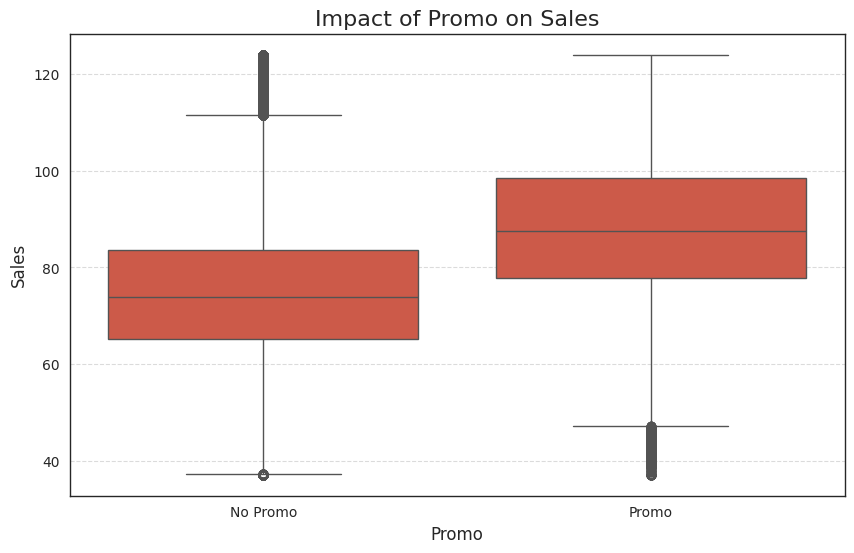

In [ ]:
open_stores_data = rossman_df[rossman_df["Open"] == 1]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Promo", y="Sales", data=open_stores_data)
plt.title("Impact of Promo on Sales", fontsize=16)
plt.xlabel("Promo", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No Promo", "Promo"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The box plot above illustrates the impact of promotions on sales. It shows how sales differ between days with active promotions (Promo = 1) and without promotions (Promo = 0).

From the visualization we can see sales are generally higher when promotions are active.

But let us dive deeper, and see how Promotions affect the Sales with time.

In [ ]:
# Group sales by Year, Month, and DayOfWeek, considering Promo
grouped_yearly = open_stores_data.groupby(["Year", "Promo"])["Sales"].mean().reset_index()
grouped_monthly = open_stores_data.groupby(["Month", "Promo"])["Sales"].mean().reset_index()
grouped_weekly = open_stores_data.groupby(["DayOfWeek", "Promo"])["Sales"].mean().reset_index()


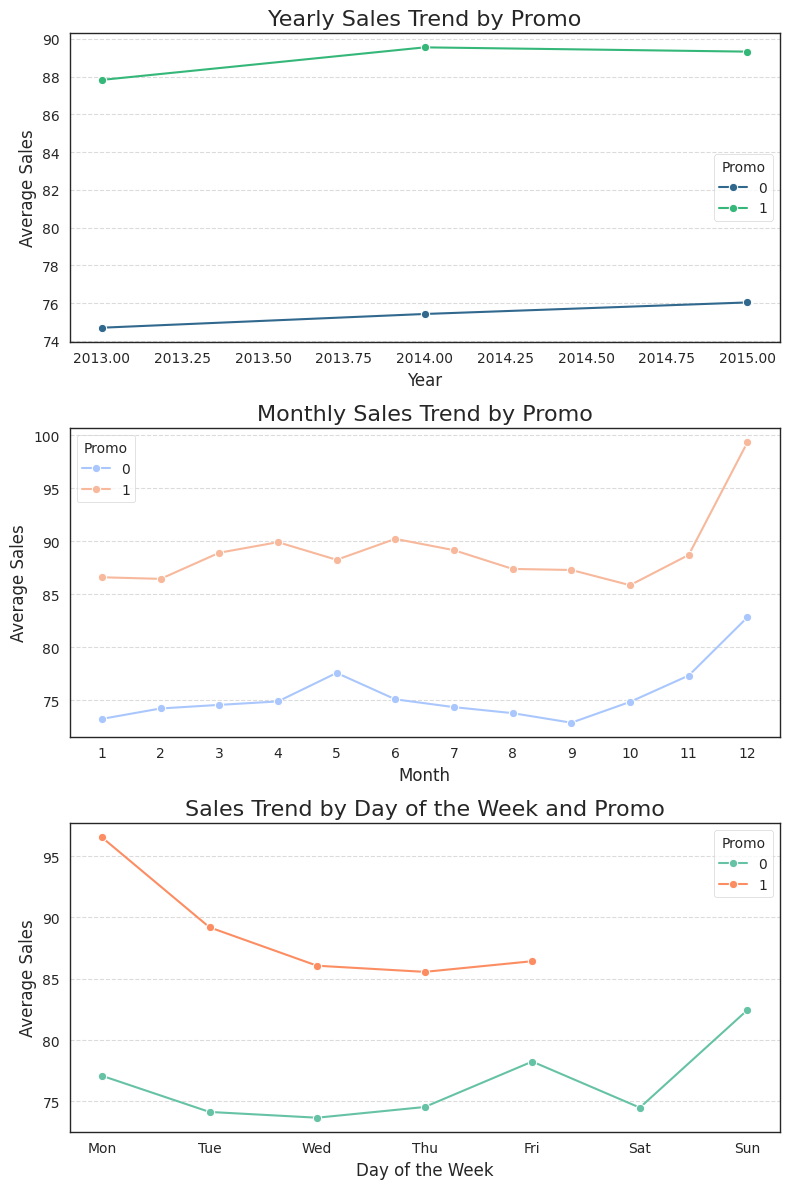

In [ ]:
# Visualize sales trends yearly, monthly, and by days of the week
fig, axes = plt.subplots(3, 1, figsize=(8,12))

# Yearly trend
sns.lineplot(x="Year", y="Sales", hue="Promo", data=grouped_yearly, ax=axes[0], marker="o", palette="viridis")
axes[0].set_title("Yearly Sales Trend by Promo", fontsize=16)
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Average Sales", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Monthly trend
sns.lineplot(x="Month", y="Sales", hue="Promo", data=grouped_monthly, ax=axes[1], marker="o", palette="coolwarm")
axes[1].set_title("Monthly Sales Trend by Promo", fontsize=16)
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Average Sales", fontsize=12)
axes[1].set_xticks(range(1, 13))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Weekly trend
sns.lineplot(x="DayOfWeek", y="Sales", hue="Promo", data=grouped_weekly, ax=axes[2], marker="o", palette="Set2")
axes[2].set_title("Sales Trend by Day of the Week and Promo", fontsize=16)
axes[2].set_xlabel("Day of the Week", fontsize=12)
axes[2].set_ylabel("Average Sales", fontsize=12)
axes[2].set_xticks(range(1, 8))
axes[2].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The plots above show the impact of promotions (Promo) on sales across different time dimensions:

**Yearly Sales Trend:**

Sales during promotional periods are consistently higher than on non-promotional days across years.

The trend highlights overall growth or seasonal patterns in sales.

**Monthly Sales Trend:**

Promotions significantly boost sales every month, with some months showing a larger effect (possibly holiday or seasonal periods).

You can observe which months are most affected by promotions.

**Day of the Week Sales Trend:**

Sales are highest towards the end of the week, especially on promotional days (likely due to weekend shopping trends).

Promotional effects vary slightly across the week, with weekends showing larger increases.

Should try to have Promo on sunday because that would boost sales even more.

A bar plot can summarize the average number of customers for promo vs. no promo.

<ipython-input-53-0d0ed04aadbb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Promo", y="Customers", data=avg_customers, palette="viridis")


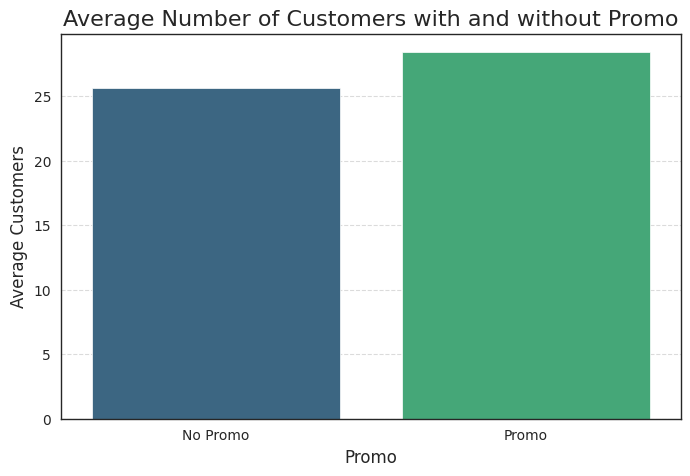

In [ ]:
plt.figure(figsize=(8, 5))
avg_customers = open_stores_data.groupby("Promo")["Customers"].mean().reset_index()
sns.barplot(x="Promo", y="Customers", data=avg_customers, palette="viridis")
plt.title("Average Number of Customers with and without Promo", fontsize=16)
plt.xlabel("Promo", fontsize=12)
plt.ylabel("Average Customers", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No Promo", "Promo"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



---



# Predicting Sales by Linear Regression

**Feature Engineering and Pre- Processing the data**

In [ ]:
#One hot encoding for categorical features like StoreType and Assortment
copy_merge=pd.get_dummies(copy_merge, columns = ['StoreType', 'Assortment'])
copy_merge.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,72.546537,23.558438,1,1,0,1,2015,...,0.0,0.0,0,False,False,True,False,True,False,False
1,2,5,2015-07-31,77.871689,25.000000,1,1,0,1,2015,...,13.0,2010.0,"Jan,Apr,Jul,Oct",True,False,False,False,True,False,False


In [ ]:
# Where stores are closed, they won't generate sales.
copy_merge = copy_merge[copy_merge.Open != 0]

In [ ]:
#Dropping columns that are not needed
copy_merge = copy_merge.drop(['Open', 'PromoInterval', 'Date', 'Store', 'Sales/Customer','Promo2','Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1)


In [ ]:
copy_merge.head(2)

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,72.546537,23.558438,1,0,1,2015,7,31,31,7.146772,False,False,True,False,True,False,False
1,5,77.871689,25.000000,1,0,1,2015,7,31,31,6.345636,True,False,False,False,True,False,False


In [ ]:
# Evaluating function for our different models
def evaluate_model(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):
  # Calculate MSE for training and testing sets
  train_mse = mean_squared_error(y_train, y_pred_train)
  test_mse = mean_squared_error(y_test, y_pred_test)

  # Calculate RMSE for training and testing sets
  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  # Calculate R2 Score for training and testing sets
  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  # Print Evaluation Metrics
  print("-----------Model Evaluation Metrics-----------")
  print(f"Training Data Set Mean Squared Error: {train_mse:.4f}")
  print(f"Test Data Set Mean Squared Error: {test_mse:.4f}")
  print("-" * 40)

  print(f"Training Data Set Root Mean Squared Error: {train_rmse:.4f}")
  print(f"Test Data Set Root Mean Squared Error: {test_rmse:.4f}")
  print("-" * 40)

  print(f"Training Data Set R2 Score: {train_r2:.4f}")
  print(f"Test Data Set R2 Score: {test_r2:.4f}")
  print("-" * 40)


In [ ]:
# Breaking the dataset into predictor and target variable

X = copy_merge[[i for i in copy_merge.columns if i not in ['Sales']]]
Y = copy_merge['Sales']

In [ ]:
X.head(3)

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,23.558438,1,0,1,2015,7,31,31,7.146772,False,False,True,False,True,False,False
1,5,25.000000,1,0,1,2015,7,31,31,6.345636,True,False,False,False,True,False,False
2,5,28.653098,1,0,1,2015,7,31,31,9.556055,True,False,False,False,True,False,False


In [ ]:
Y.head(3)

,Sales
0,72.546537
1,77.871689
2,91.181138


In [ ]:
# Train Test Split with test size 0.2 and random state 7
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


In [ ]:
# Normalizing the predictor variables
scaler = MinMaxScaler()

In [ ]:
columns=X_train.columns

# **Linear Regression**

In [ ]:
# Transforming data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Training with Linear Regression Model
reg =LinearRegression()
reg.fit(X_train , y_train)
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

In [ ]:
print("The value of evaluation metrics for Simple Linear Regression are:")
evaluate_model(X_train, X_test, y_train, y_test, pred_train, pred_test)

The value of evaluation metrics for Simple Linear Regression are:
-----------Model Evaluation Metrics-----------
Training Data Set Mean Squared Error: 44.9201
Test Data Set Mean Squared Error: 44.6053
----------------------------------------
Training Data Set Root Mean Squared Error: 6.7022
Test Data Set Root Mean Squared Error: 6.6787
----------------------------------------
Training Data Set R2 Score: 0.8385
Test Data Set R2 Score: 0.8403
----------------------------------------


In [ ]:
#storing 100 observations for analysis
simple_lr_pred = pred_test[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

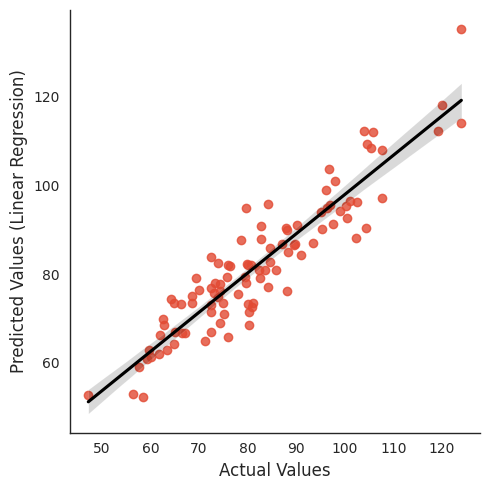

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'})\
    .set_axis_labels("Actual Values", "Predicted Values (Linear Regression)")


# **Lasso Regression**

In [ ]:
lasso = LassoLars(alpha=0.3, fit_intercept=False)
reg_las = lasso.fit(X_train, y_train)
pred_train_las = reg_las.predict(X_train)
pred_test_las = reg_las.predict(X_test)
print("The value of evaluation metrics for Lasso Regression are:")
evaluate_model(X_train, X_test, y_train, y_test, pred_train_las, pred_test_las)


The value of evaluation metrics for Lasso Regression are:
-----------Model Evaluation Metrics-----------
Training Data Set Mean Squared Error: 52.7033
Test Data Set Mean Squared Error: 52.2461
----------------------------------------
Training Data Set Root Mean Squared Error: 7.2597
Test Data Set Root Mean Squared Error: 7.2281
----------------------------------------
Training Data Set R2 Score: 0.8105
Test Data Set R2 Score: 0.8130
----------------------------------------


# **Decision Tree**

In [ ]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)
print("The value of evaluation metrics for Decision Tree Regression are:")
evaluate_model(X_train, X_test, y_train, y_test, pred_train_tree, pred_test_tree)

The value of evaluation metrics for Decision Tree Regression are:
-----------Model Evaluation Metrics-----------
Training Data Set Mean Squared Error: 0.0040
Test Data Set Mean Squared Error: 20.9325
----------------------------------------
Training Data Set Root Mean Squared Error: 0.0631
Test Data Set Root Mean Squared Error: 4.5752
----------------------------------------
Training Data Set R2 Score: 1.0000
Test Data Set R2 Score: 0.9251
----------------------------------------


# **Decision Tree with tuned Hyper Parameter**

In [ ]:
tree = DecisionTreeRegressor()

params = {
        'min_samples_split':[2,3,5,7],
        'min_samples_leaf':[6,8,10],
        }

grid = RandomizedSearchCV(estimator=tree,param_distributions=params,verbose=True,cv=10)
#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'min_samples_split': 2, 'min_samples_leaf': 8}

**So the best parameter for the model is minimum samples splitting of 5 and minimum sample leaf 8.**

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
reg_tree = tree.fit(X_train, y_train)
tuned_pred_train_tree = tree.predict(X_train)
tuned_pred_test_tree = tree.predict(X_test)

In [ ]:
print("The value of evaluation metrics for Decision Tree Regression are:")
evaluate_model(X_train, X_test, y_train, y_test, tuned_pred_train_tree, tuned_pred_test_tree)

The value of evaluation metrics for Decision Tree Regression are:
-----------Model Evaluation Metrics-----------
Training Data Set Mean Squared Error: 8.9394
Test Data Set Mean Squared Error: 16.1048
----------------------------------------
Training Data Set Root Mean Squared Error: 2.9899
Test Data Set Root Mean Squared Error: 4.0131
----------------------------------------
Training Data Set R2 Score: 0.9679
Test Data Set R2 Score: 0.9424
----------------------------------------


In [ ]:
#storing 100 observations for analysis
tuned_pred = tuned_pred_test_tree[:100]
Actual_value= y_test[:100]
tuned_dataset = pd.DataFrame({'Real':Actual_value,'Predicted':tuned_pred})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
tuned_dataset['diff']=(tuned_dataset['Real']-tuned_dataset['Predicted']).abs()

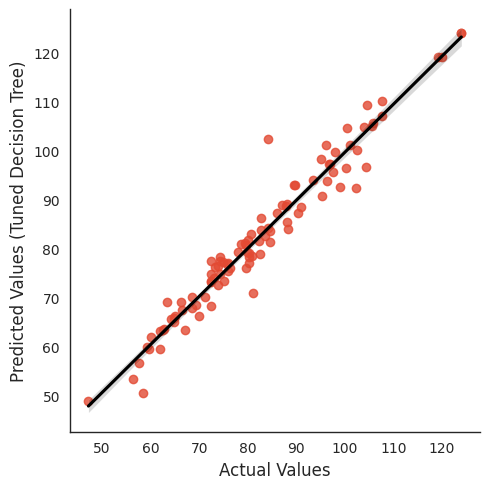

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='Predicted', data=tuned_dataset, line_kws={'color': 'black'})\
    .set_axis_labels("Actual Values", "Predicted Values (Tuned Decision Tree)")


Let's us see the performan of all the algorithms

In [ ]:
Evaluation_Table=pd.DataFrame({'Model':['Linear Regression','Lasso Regression','Decision Tree','Tuned Decision Tree'],
              'RMSE':[6.678, 7.228, 4.5752,4.0131], 'R-2 Score':[0.8403, 0.8130, 0.9251, 0.9424]})

Evaluation_Table

,Model,RMSE,R-2 Score
0,Linear Regression,6.6780,0.8403
1,Lasso Regression,7.2280,0.8130
2,Decision Tree,4.5752,0.9251
3,Tuned Decision Tree,4.0131,0.9424


# **Conclusion**
The evaluation results reveal distinct variations in the predictive performance of the three machine learning models: Linear Regression, Lasso Regression, and Decision Tree.

Linear Regression and Lasso Regression demonstrate similar levels of predictive accuracy, both achieving R-squared values near 0.84 and 0.81 respectively. This indicates that these models are effective at capturing the relationships between the independent and dependent variables, offering reliable performance for the dataset.

In contrast, the Decision Tree model exhibits exceptional predictive accuracy, with an extraordinarily high R-squared value of approximately 1 on training data and 0.92 on test data with a low Mean Squared Error. This suggests that the model nearly perfectly predicts the target variable with minimal errors.

However, it is important to recognize the potential drawback of the Decision Tree model—its susceptibility to overfitting, especially with complex datasets. While its performance in this evaluation is remarkable, further testing is necessary to assess its generalization ability and suitability for real-world applications.

So to counter that we can tune the hyperparameters and after doing that we got a decsion tree which had R-squared value of 0.9679 on training data and 0.9424 on test data which is somewhat better.

In conclusion, while all three models have their strengths and limitations, the Decision Tree model emerges as the most effective for this dataset. Nevertheless, selecting the most appropriate model should be guided by the specific requirements and characteristics of the application domain.